In [2]:
# 수치 계산
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 그래프
from matplotlib import pyplot as plt
import seaborn as sns
sns.set( )
# 통계 모델을 추정하는 라이브러리 ( 경고가 나올 수 있음 ) 
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 표시 자리수의 지정
%precision 3
# 그래프를 jupyter Notebook 에 표시하기위한 지정
%matplotlib inline

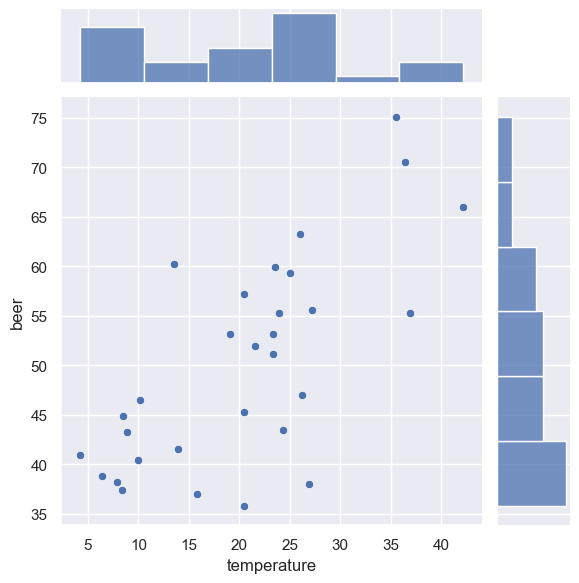

In [6]:
beer = pd.read_csv("./5-1-1-beer.csv")
sns.jointplot(x = "temperature", y = "beer", data = beer)


In [7]:
import statsmodels.formula.api as smf

In [8]:
lm_model = smf.ols(formula="beer ~ temperature",data = beer).fit()

In [9]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.11e-05
Time:                        11:07:47   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
null_model = smf.ols("beer ~ 1", data = beer).fit( )


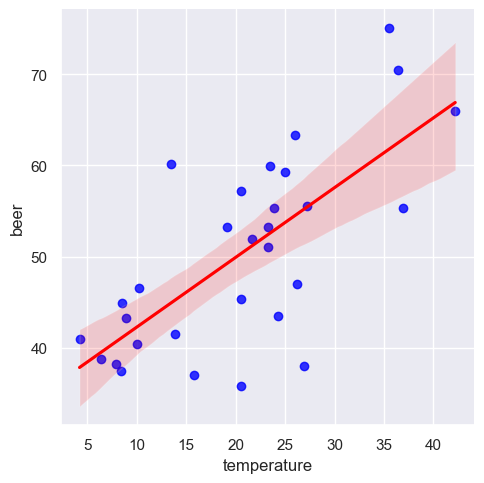

In [13]:
sns.lmplot(x = "temperature", y = "beer", data = beer,scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})


In [14]:
lm_model.predict( )

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [15]:
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

In [16]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [18]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))


0    49.918767
dtype: float64

In [17]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * temperature

49.919

In [19]:
resid = lm_model.resid
resid.head(3)


0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [20]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [21]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [22]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict( )
np.sum((yhat - mu)**2) / np.sum((y - mu)**2)



0.504

In [23]:
lm_model.rsquared

0.504

In [24]:
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n - s - 1)) /(np.sum((y - mu)**2) / (n - 1)))

0.486

In [25]:
lm_model.rsquared_adj


0.486

C:\Users\timet\AppData\Local\Temp\ipykernel_18800\4261569918.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid)


<Axes: ylabel='Density'>

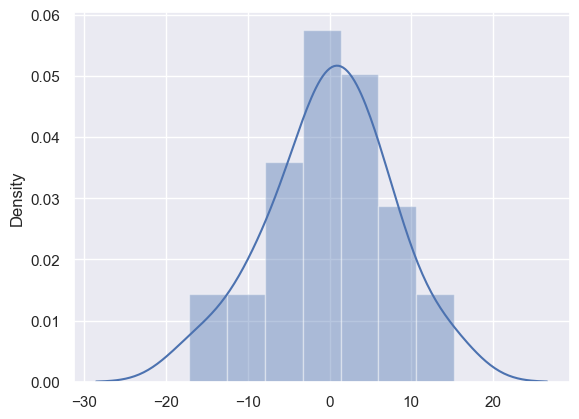

In [26]:
sns.distplot(resid)


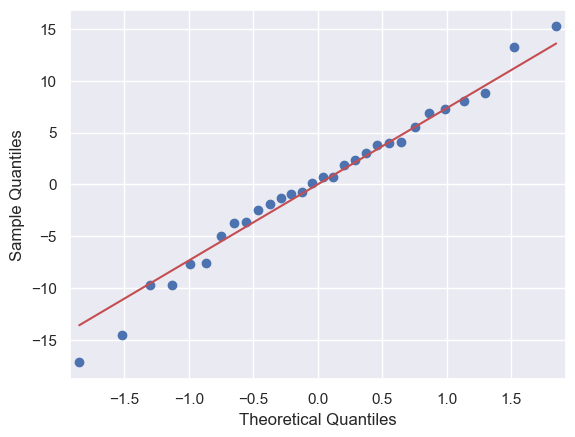

In [27]:
fig = sm.qqplot(resid, line = "s")


In [28]:
resid_sort = resid.sort_values()
resid_sort.head( )


3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [29]:
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)

In [30]:
ppf = stats.norm.ppf(cdf)

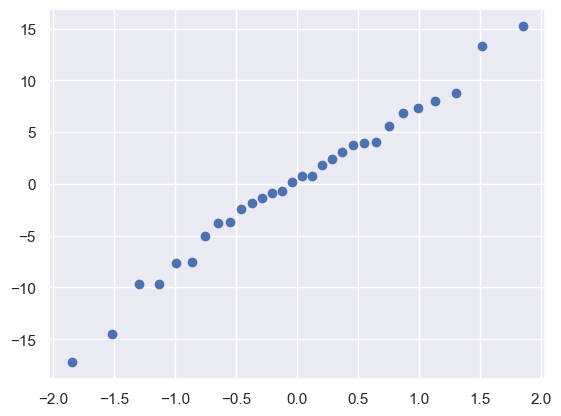

In [37]:
plt.scatter(ppf, resid_sort)

In [39]:
weather = [
"cloudy",
"cloudy",
"rainy",
"rainy",
"sunny",
"sunny"
]
beer = [6,8,2,4,10,12]
# DataFrame으로 결합
weather_beer =pd.DataFrame({
"beer" : beer,
"weather": weather
})

In [40]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0


In [41]:
effect = [7,7,3,3,11,11]
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect) ** 2 )

In [42]:
resid = weather_beer.beer - effect

In [43]:
squares_resid = np.sum(resid ** 2)
squares_resid


6

In [44]:
df_model = 2 # 군간 변동의 자유도
df_resid = 3 

In [45]:
variance_model = squares_model / df_model
variance_model


32.000

In [46]:
variance_resid = squares_resid / df_resid
variance_resid


2.000

In [47]:
f_ratio = variance_model / variance_resid

In [48]:
1 - sp.stats.f.cdf (x = f_ratio, dfn = df_model, dfd = df_resid)

0.025